Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target names: ['setosa' 'versicolor' 'virginica']
Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


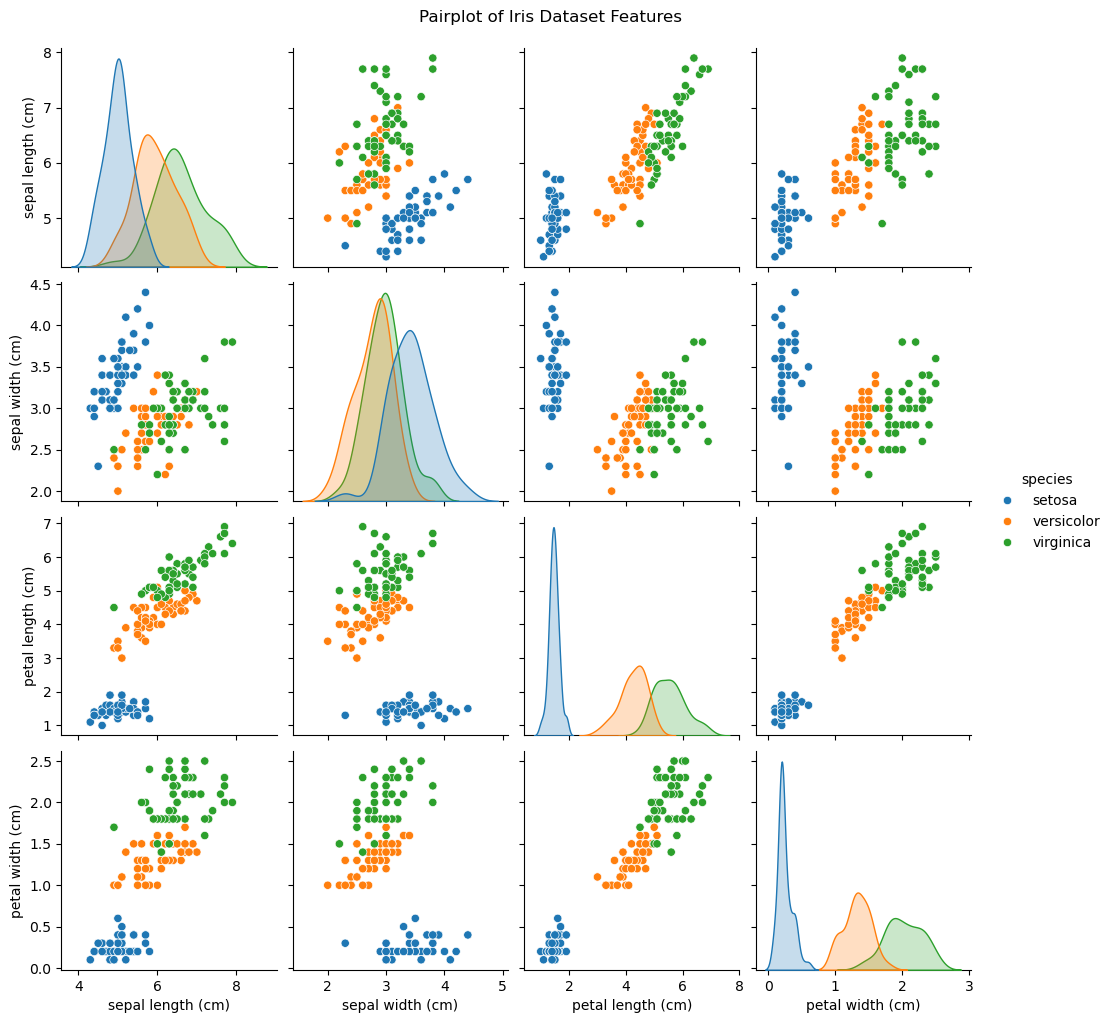

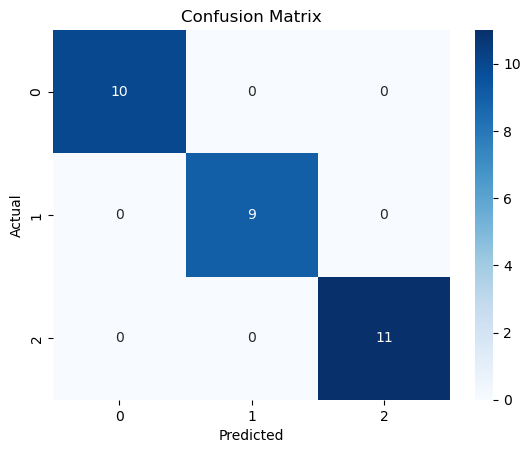

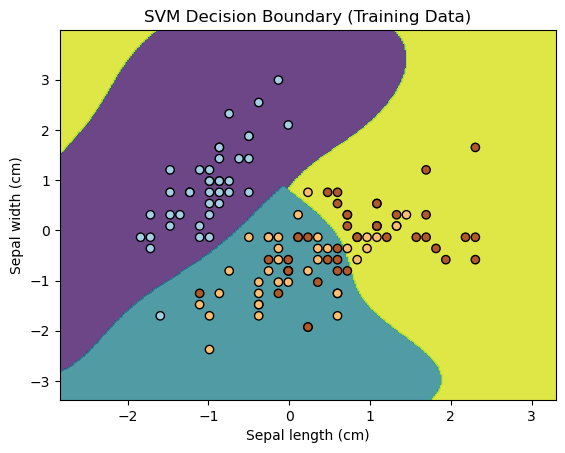

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for data exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = target_names[y]

# Data exploration
print("Dataset shape:", iris_df.shape)
print("Columns:", iris_df.columns)
print("Target names:", target_names)
print("Sample data:\n", iris_df.head())

# Check for missing values (though the Iris dataset is clean)
print("Missing values:\n", iris_df.isnull().sum())

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# K-fold Cross-Validation
k_fold = 5
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=k_fold)

# Evaluation Metrics
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



# Additional Visualizations 
# Pairplot of features colored by species
sns.pairplot(iris_df, hue='species', height=2.5)
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

# Confusion Matrix Heatmap (Optional)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Decision Boundary Plot (2D)
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title(title)
    plt.show()
# Visualize decision boundary on training data (using only first two features)
X_train_two_features = X_train_scaled[:, :2]  # Considering only first two features for visualization
svm_model_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_2d.fit(X_train_two_features, y_train)
plot_decision_boundary(X_train_two_features, y_train, svm_model_2d, "SVM Decision Boundary (Training Data)")


Null values in the dataset: 0


/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


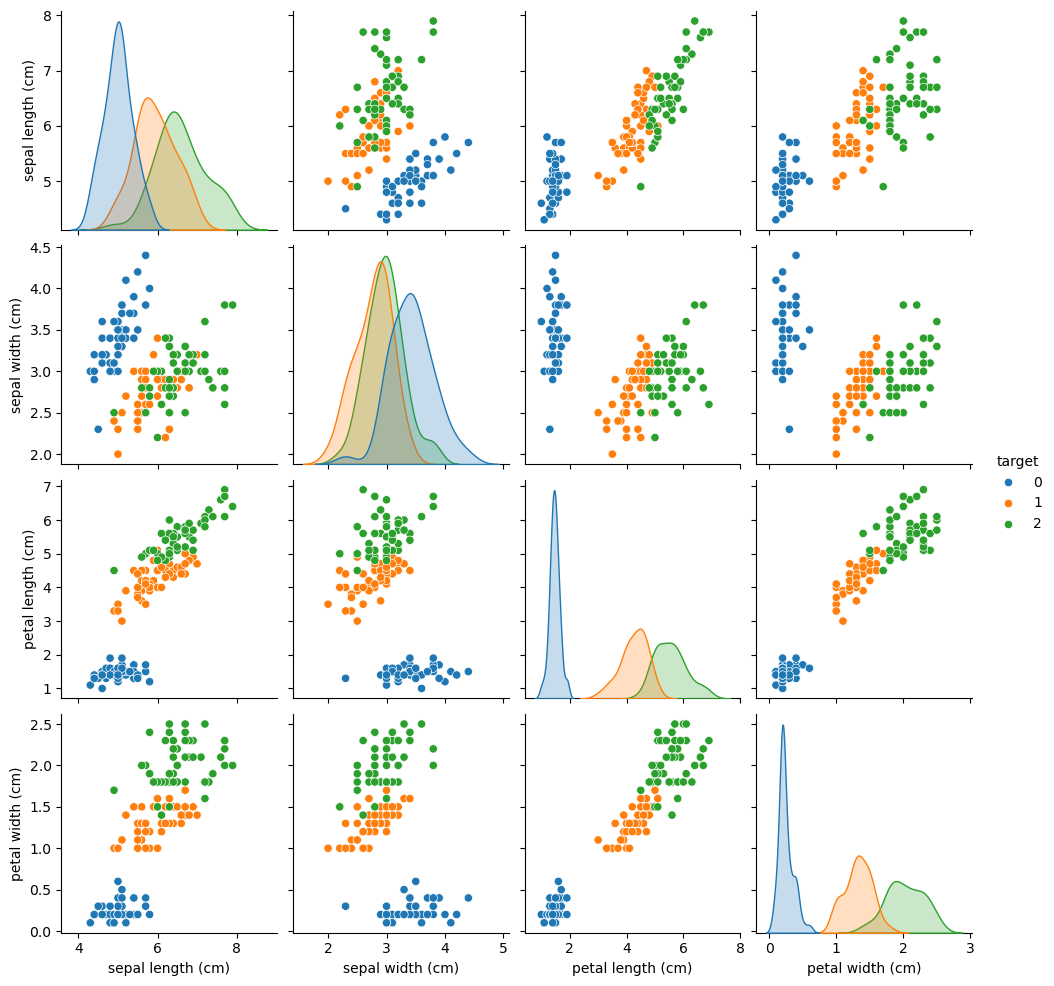

Kernel: linear, Accuracy: 0.97, Std Dev: 0.01
Kernel: rbf, Accuracy: 0.97, Std Dev: 0.02
Kernel: sigmoid, Accuracy: 0.91, Std Dev: 0.03
Kernel: poly, Accuracy: 0.93, Std Dev: 0.03


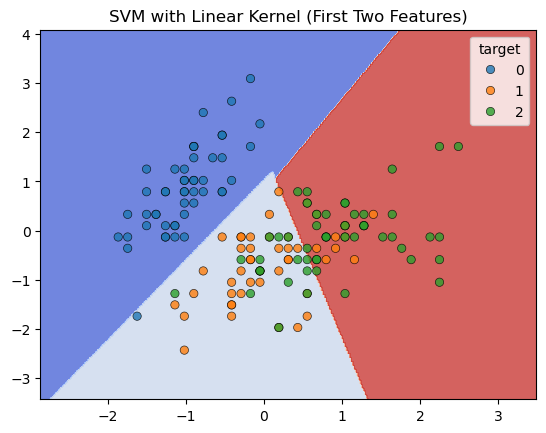

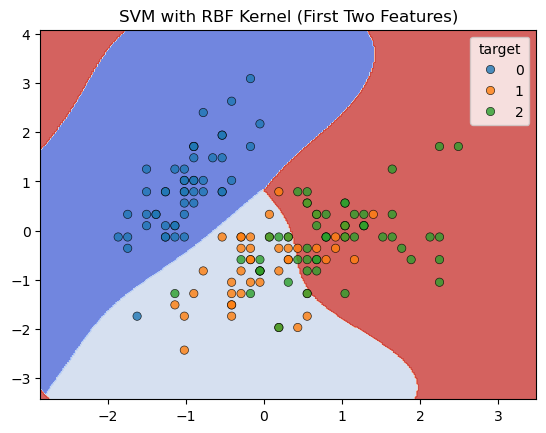

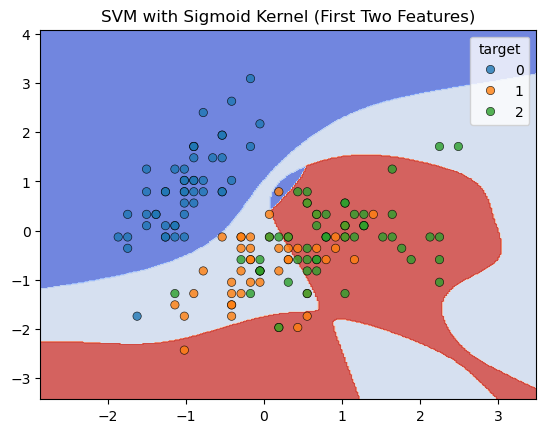

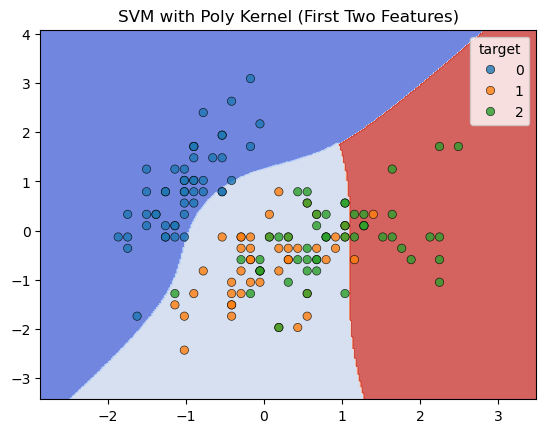

In [18]:

# Import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Dataset loading
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names = iris.target_names

# Checking null values
print("Null values in the dataset:", df.isnull().sum().sum())  # Check if any null values

# Visualization (Pairplot to understand the relationships between features)
sns.pairplot(df, hue='target', palette='tab10', diag_kind='kde')
plt.show()

# Scaling features
scaler = StandardScaler()  # Normalize the feature values for SVM
X = df.iloc[:, :-1]  # Features
y = df['target']  # Target variable
X_scaled = scaler.fit_transform(X)

# SVM classification with different kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']

results = {}  # Dictionary to store results

# Finding evaluation metrics using k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

for kernel in kernels:
    clf = SVC(kernel=kernel, C=1)  # Support Vector Classifier
    cv_scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring='accuracy')  # Cross-validation scores
    results[kernel] = {
        'accuracy': np.mean(cv_scores),
        'std_dev': np.std(cv_scores)
    }
    print(f"Kernel: {kernel}, Accuracy: {results[kernel]['accuracy']:.2f}, Std Dev: {results[kernel]['std_dev']:.2f}")

# Visualizing the classification diagram with first two features
def plot_svm_decision_boundary(X, y, clf, title):
    # Create a mesh to plot
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='tab10', edgecolor='k', alpha=0.8)
    plt.title(title)
    plt.show()

# Use the first two features to visualize the decision boundary
X_subset = X_scaled[:, :2]

# Linear Kernel
clf_linear = SVC(kernel='linear', C=1).fit(X_subset, y)
plot_svm_decision_boundary(X_subset, y, clf_linear, 'SVM with Linear Kernel (First Two Features)')

# RBF Kernel
clf_rbf = SVC(kernel='rbf', C=1).fit(X_subset, y)
plot_svm_decision_boundary(X_subset, y, clf_rbf, 'SVM with RBF Kernel (First Two Features)')

# Sigmoid Kernel
clf_sigmoid = SVC(kernel='sigmoid', C=1).fit(X_subset, y)
plot_svm_decision_boundary(X_subset, y, clf_sigmoid, 'SVM with Sigmoid Kernel (First Two Features)')

# Poly Kernel
clf_poly = SVC(kernel='poly', C=1).fit(X_subset, y)
plot_svm_decision_boundary(X_subset, y, clf_poly, 'SVM with Poly Kernel (First Two Features)')

Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target names: ['setosa' 'versicolor' 'virginica']
Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Kernel: Linear SVM
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9694
Recall

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


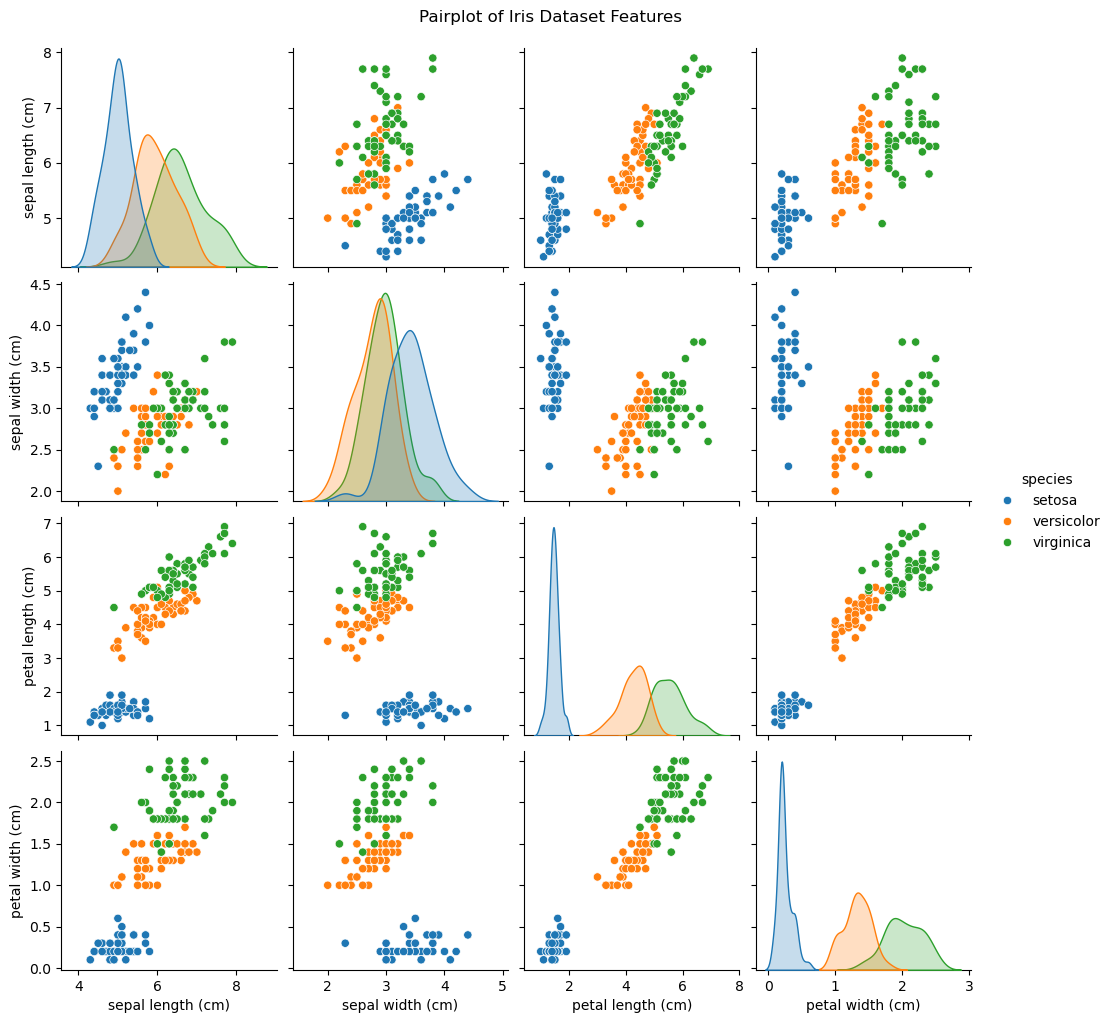

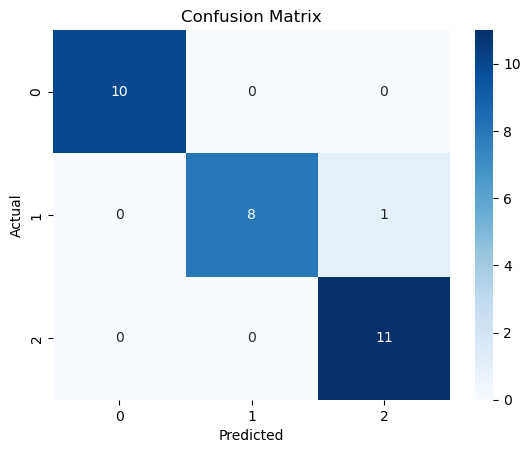

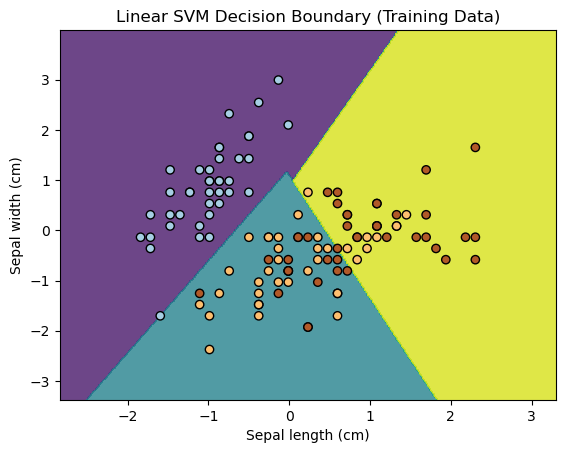


Kernel: Rbf SVM
Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


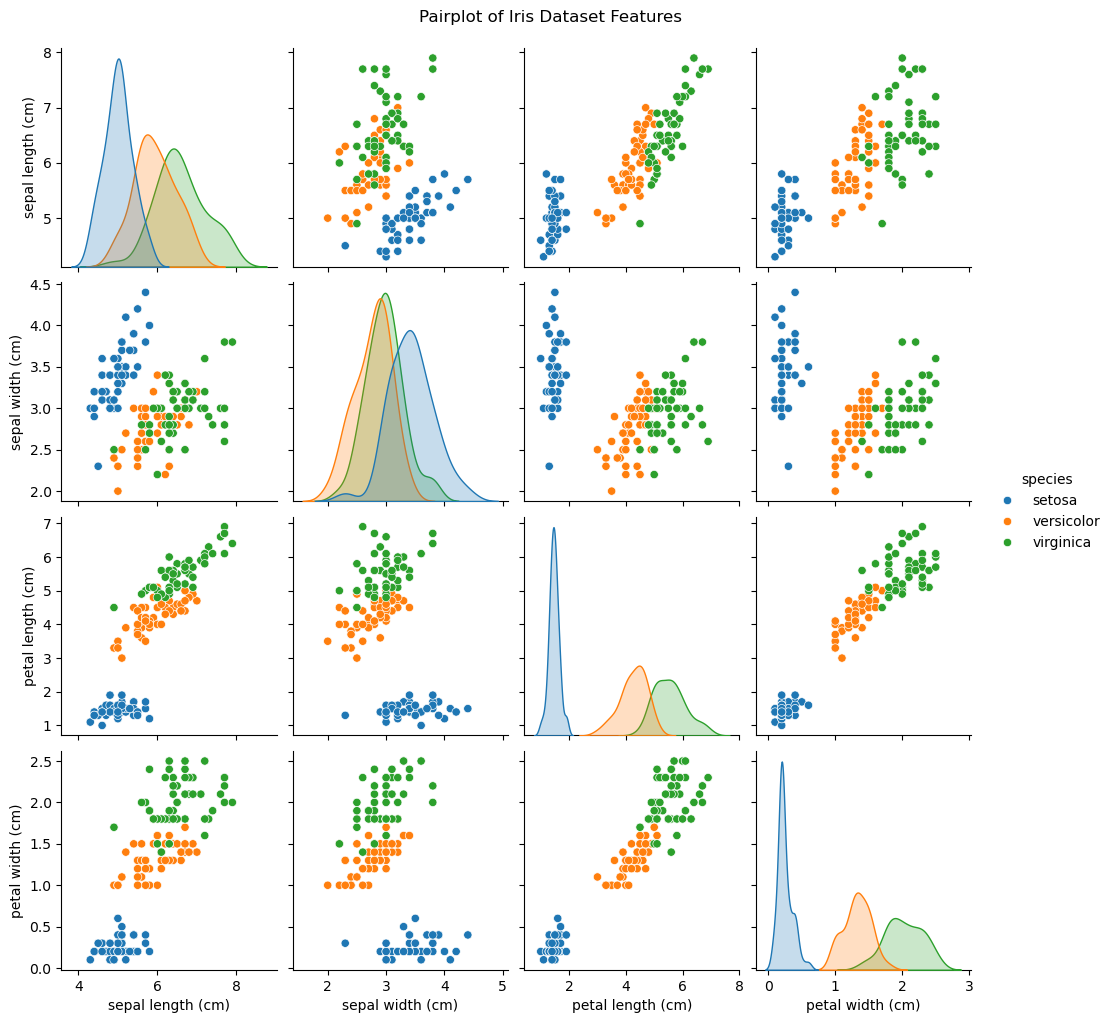

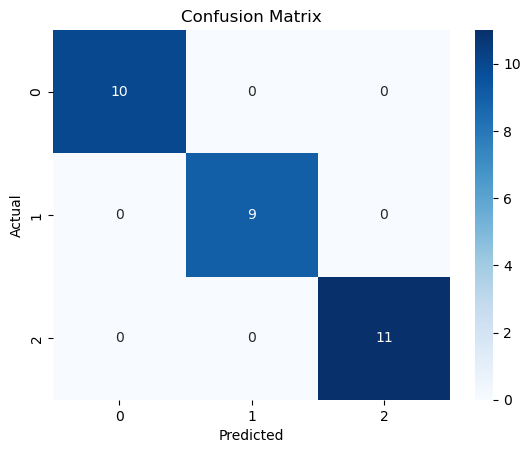

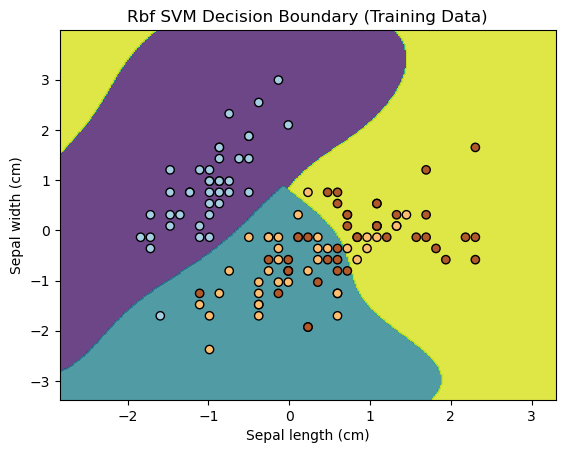


Kernel: Sigmoid SVM
Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.9014
Recall: 0.9000
F1 Score: 0.8992

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


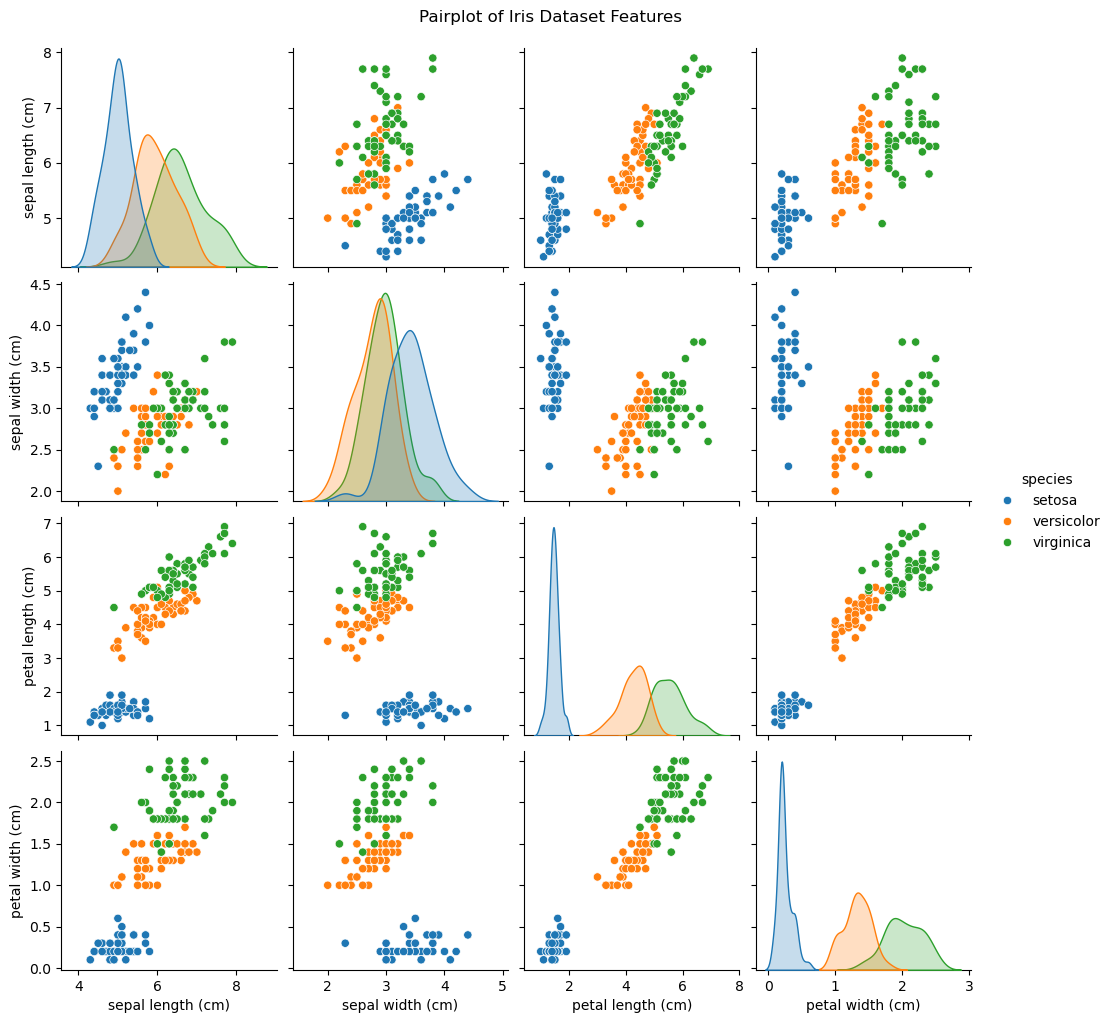

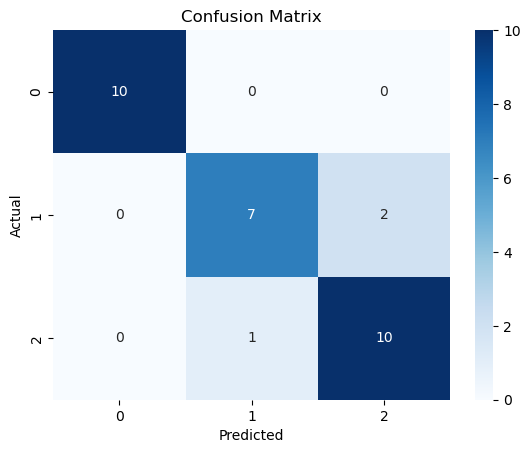

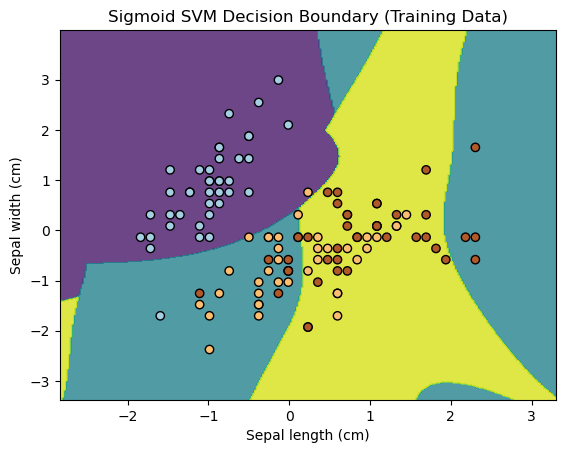


Kernel: Poly SVM
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9700
Recall: 0.9667
F1 Score: 0.9668

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


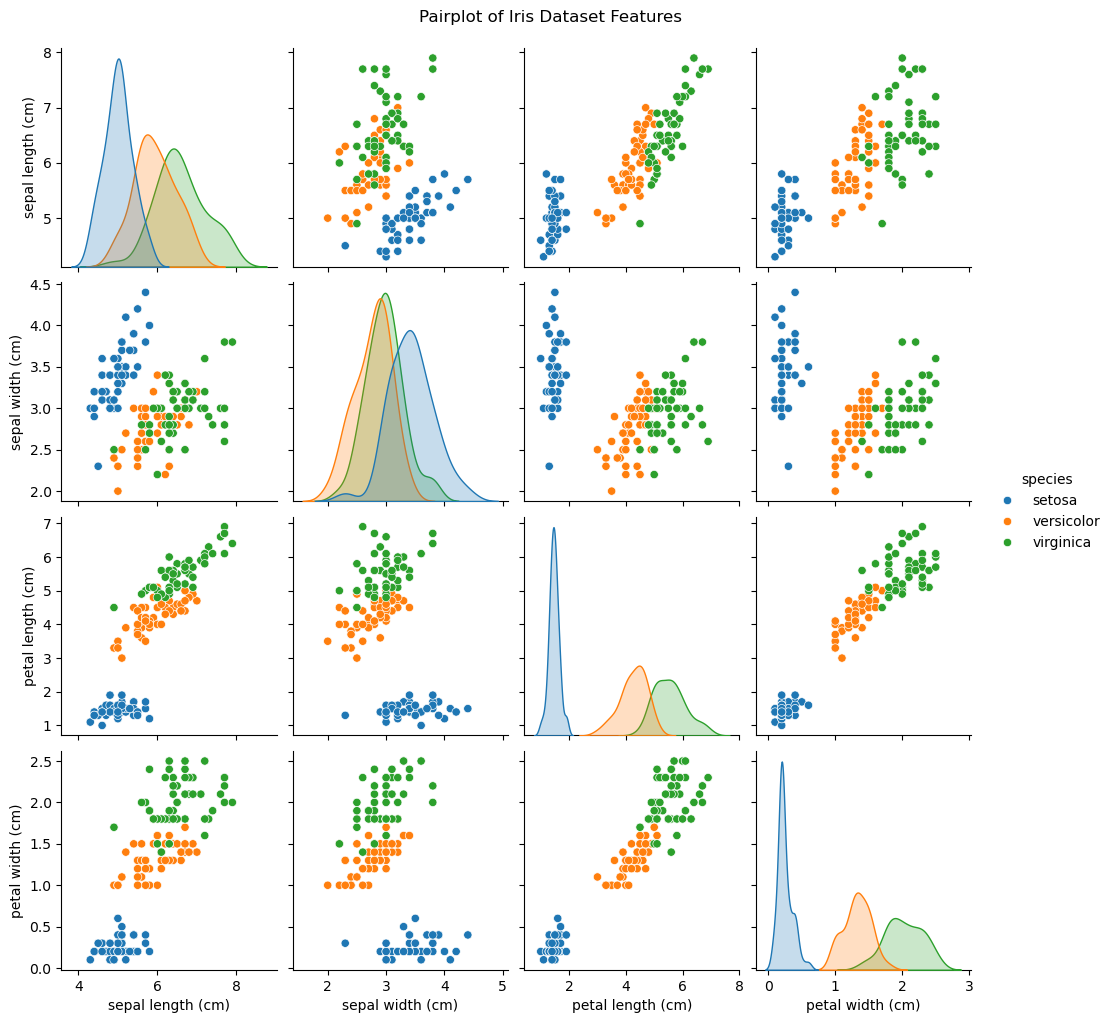

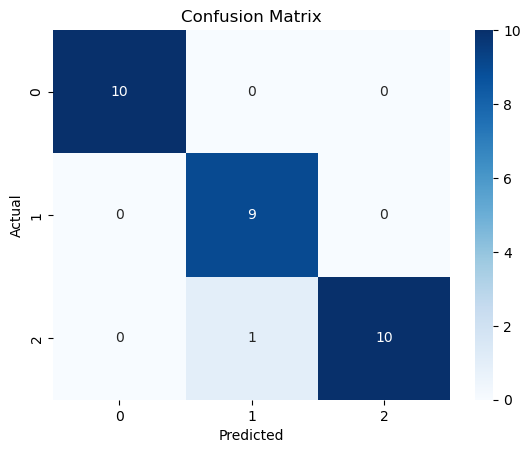

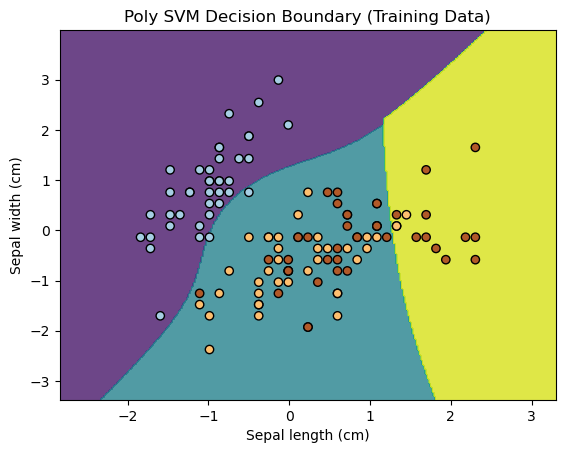

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for data exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = target_names[y]

# Data exploration
print("Dataset shape:", iris_df.shape)
print("Columns:", iris_df.columns)
print("Target names:", target_names)
print("Sample data:\n", iris_df.head())

# Check for missing values (though the Iris dataset is clean)
print("Missing values:\n", iris_df.isnull().sum())

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation with different kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Evaluation Metrics
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nKernel: {kernel.capitalize()} SVM")
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Pairplot of features colored by species
    sns.pairplot(iris_df, hue='species', height=2.5)
    plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
    plt.show()

    # Confusion Matrix Heatmap
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Decision Boundary Plot (2D)
    def plot_decision_boundary(X, y, model, title):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length (cm)')
        plt.ylabel('Sepal width (cm)')
        plt.title(title)
        plt.show()

    # Visualize decision boundary on training data (using only first two features)
    X_train_two_features = X_train_scaled[:, :2]  # Considering only first two features for visualization
    svm_model_2d = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model_2d.fit(X_train_two_features, y_train)
    plot_decision_boundary(X_train_two_features, y_train, svm_model_2d, f"{kernel.capitalize()} SVM Decision Boundary (Training Data)")


Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target names: ['setosa' 'versicolor' 'virginica']
Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Kernel: Linear SVM
Cross-Validation Scores: [0.95833333 1.         0.83333333 1.

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


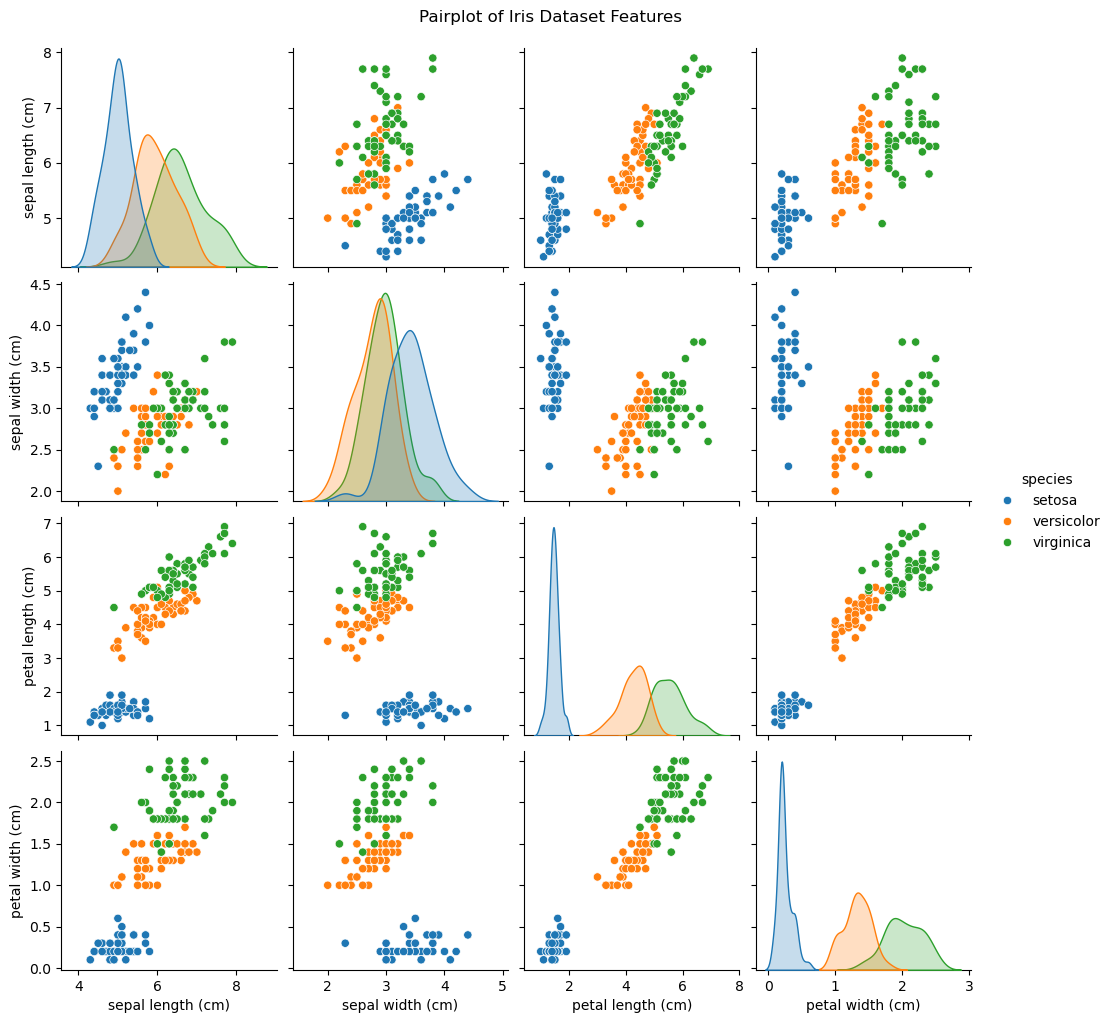

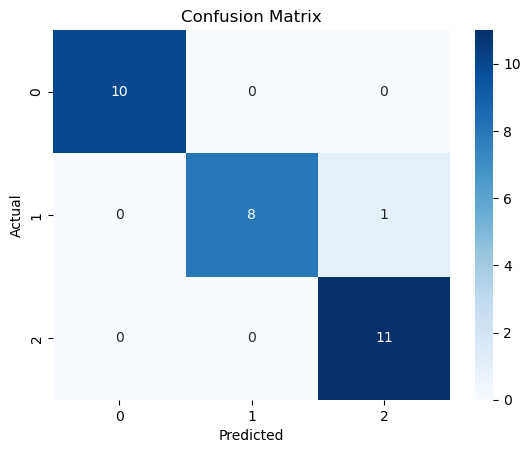

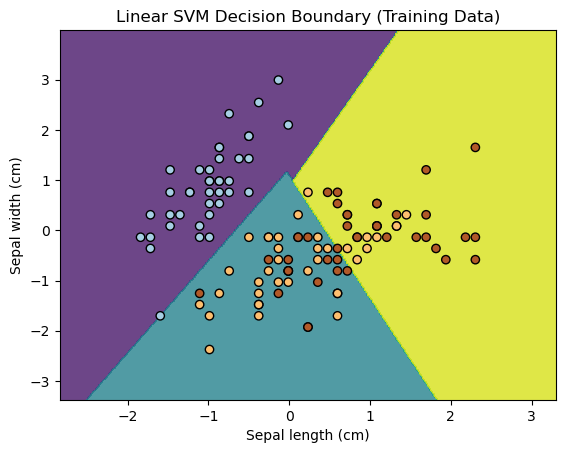


Kernel: Rbf SVM
Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV Accuracy: 0.95
Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


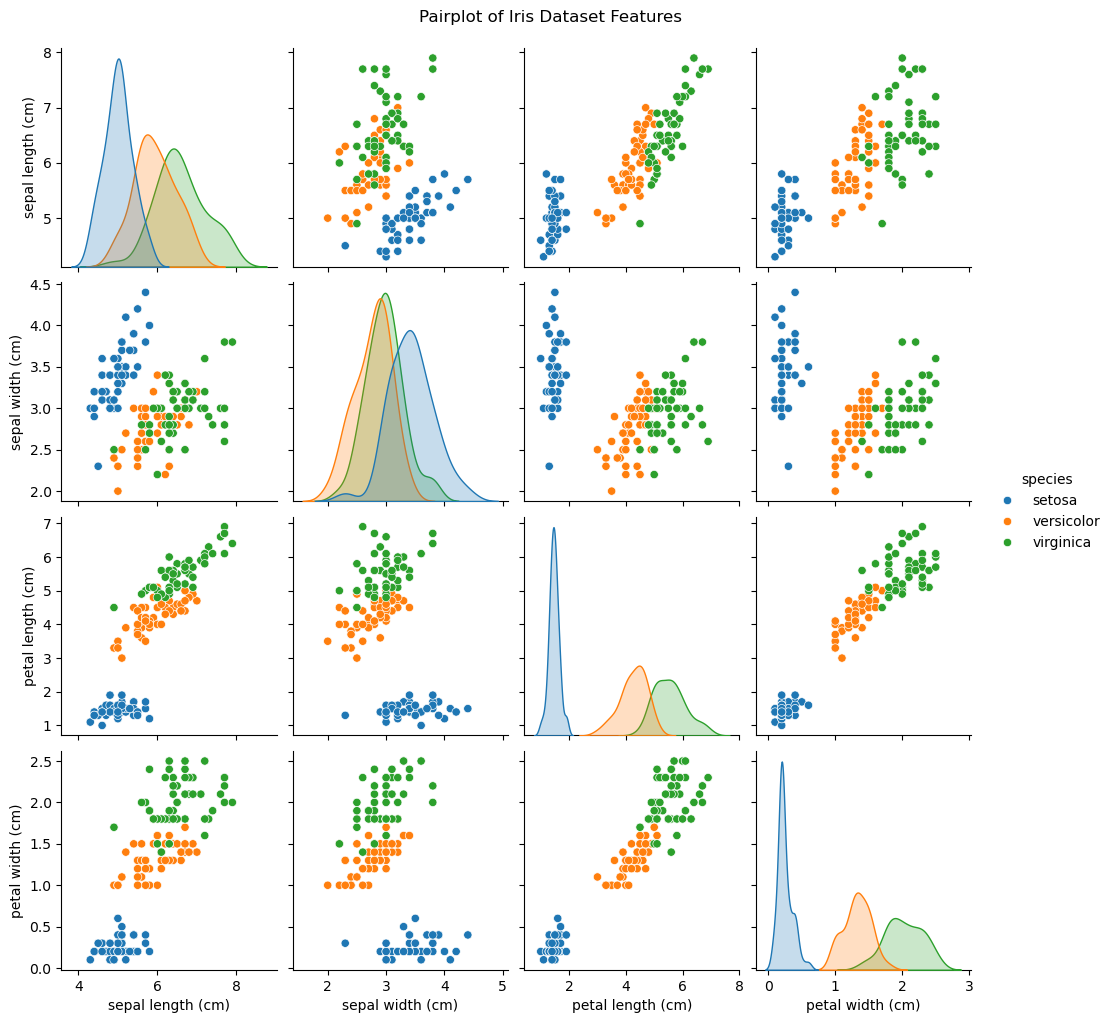

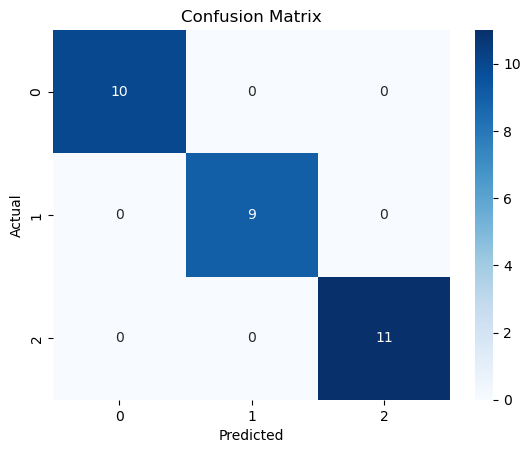

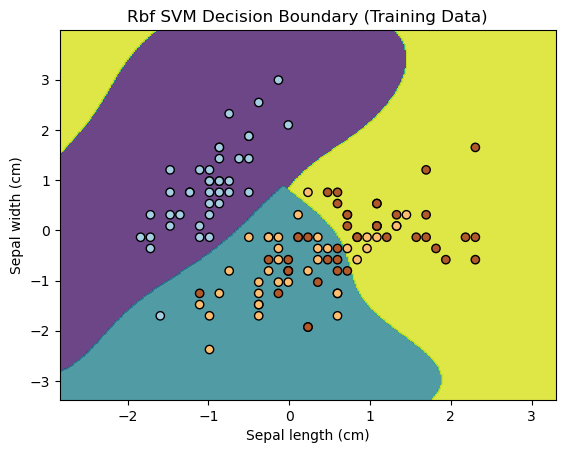


Kernel: Sigmoid SVM
Cross-Validation Scores: [0.95833333 0.95833333 0.83333333 0.875      0.91666667]
Mean CV Accuracy: 0.9083333333333334
Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.9014
Recall: 0.9000
F1 Score: 0.8992

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


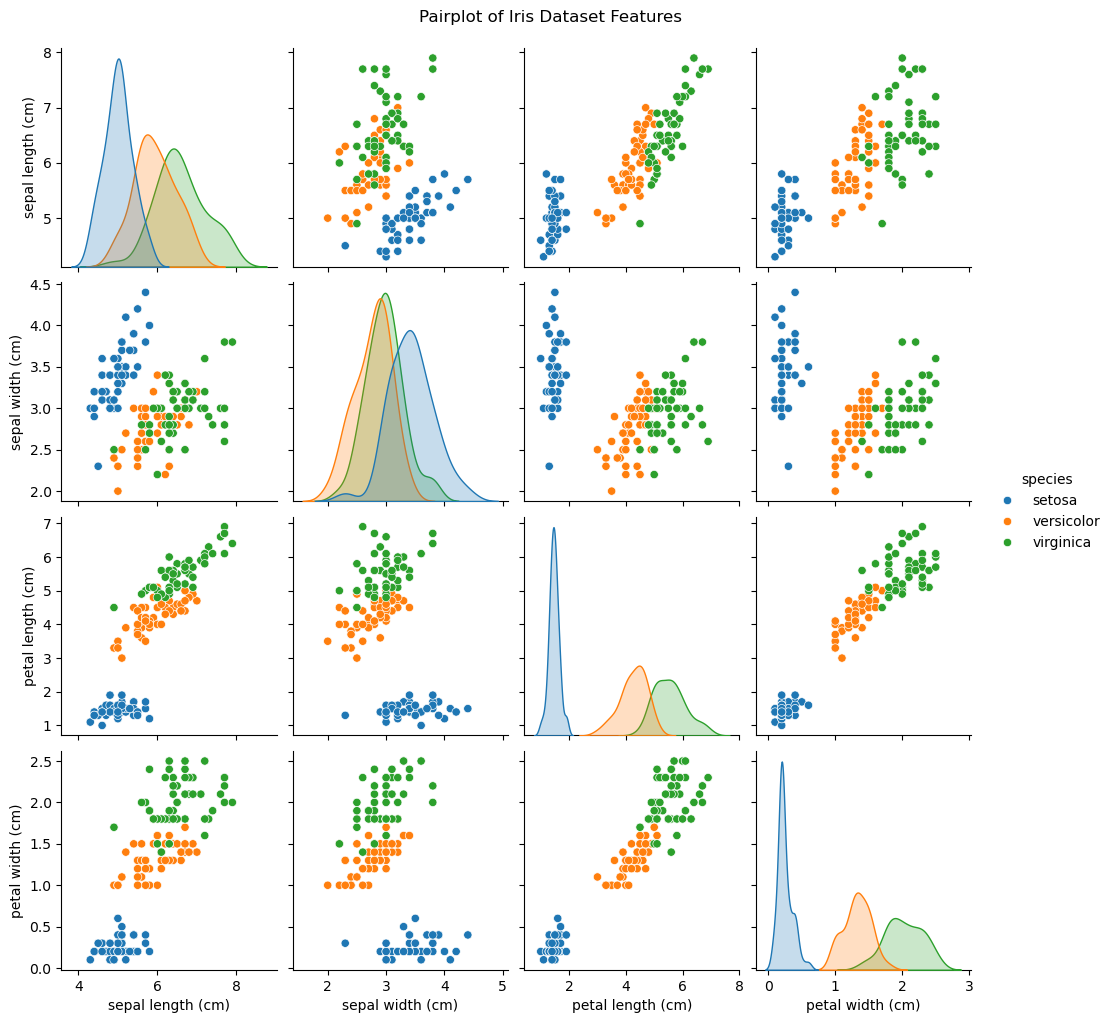

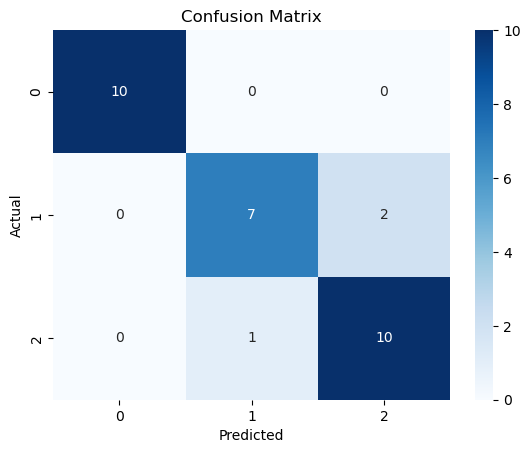

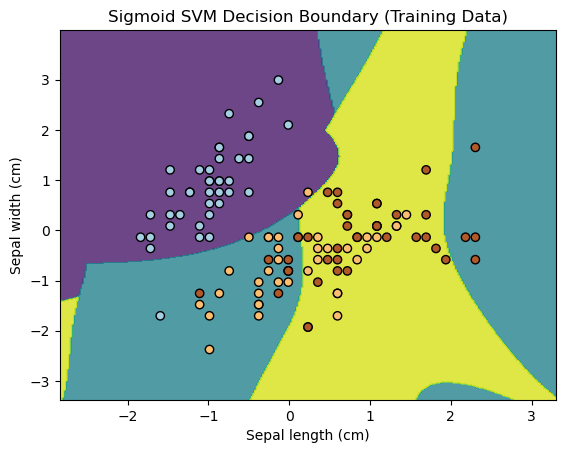


Kernel: Poly SVM
Cross-Validation Scores: [0.95833333 0.91666667 0.91666667 0.95833333 0.875     ]
Mean CV Accuracy: 0.925
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9700
Recall: 0.9667
F1 Score: 0.9668

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


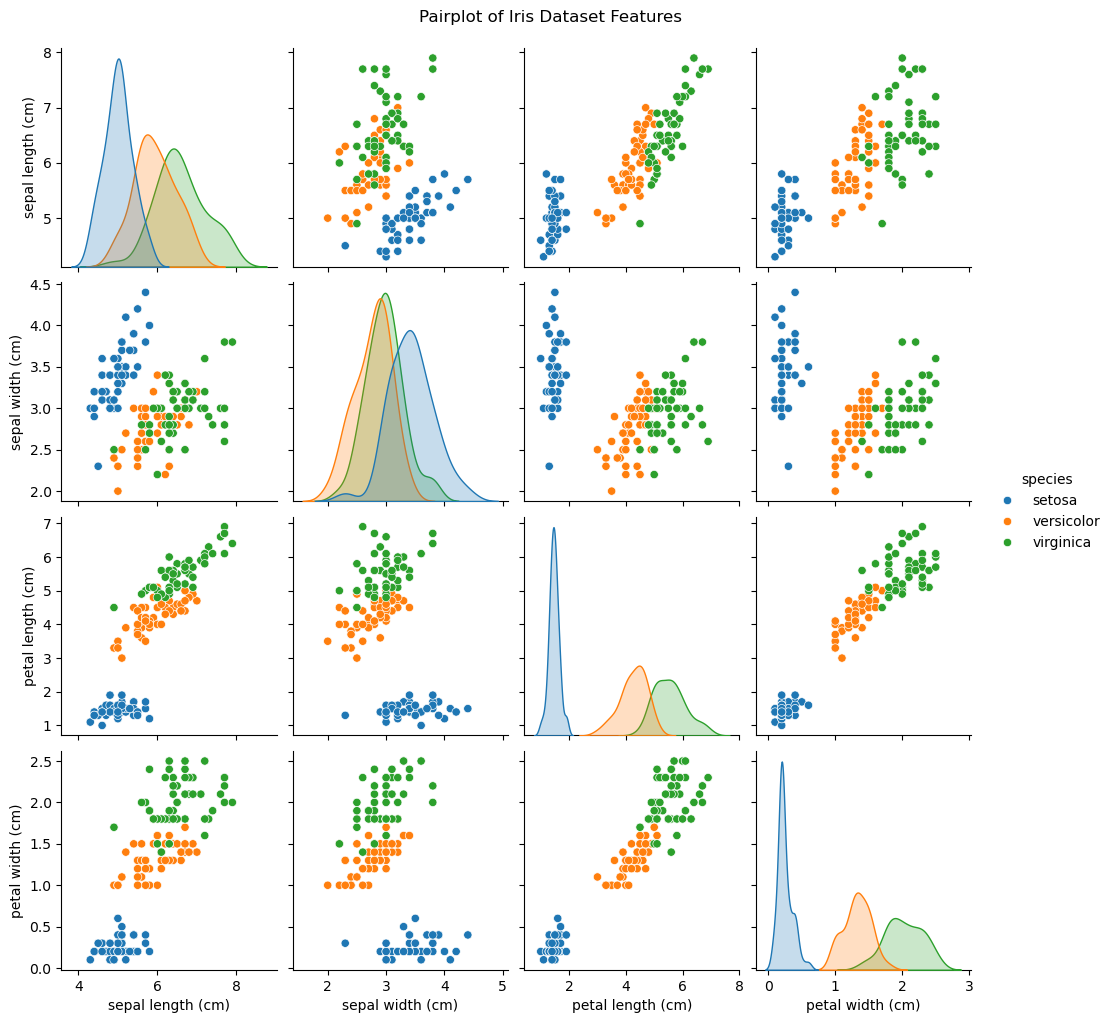

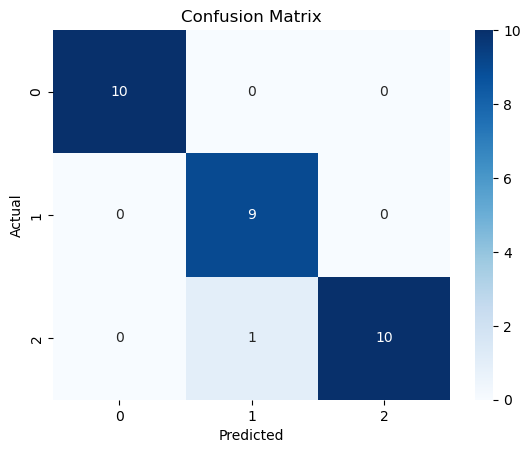

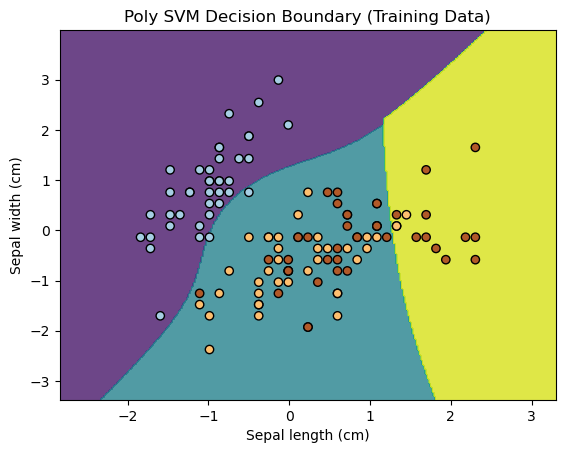

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for data exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = target_names[y]

# Data exploration
print("Dataset shape:", iris_df.shape)
print("Columns:", iris_df.columns)
print("Target names:", target_names)
print("Sample data:\n", iris_df.head())

# Check for missing values (though the Iris dataset is clean)
print("Missing values:\n", iris_df.isnull().sum())

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation with different kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    print(f"\nKernel: {kernel.capitalize()} SVM")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", np.mean(cv_scores))

    # Model fitting
    svm_model.fit(X_train_scaled, y_train)

    # Evaluation Metrics
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Pairplot of features colored by species
    sns.pairplot(iris_df, hue='species', height=2.5)
    plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
    plt.show()

    # Confusion Matrix Heatmap
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Decision Boundary Plot (2D)
    def plot_decision_boundary(X, y, model, title):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length (cm)')
        plt.ylabel('Sepal width (cm)')
        plt.title(title)
        plt.show()

    # Visualize decision boundary on training data (using only first two features)
    X_train_two_features = X_train_scaled[:, :2]  # Considering only first two features for visualization
    svm_model_2d = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model_2d.fit(X_train_two_features, y_train)
    plot_decision_boundary(X_train_two_features, y_train, svm_model_2d, f"{kernel.capitalize()} SVM Decision Boundary (Training Data)")


Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target names: ['setosa' 'versicolor' 'virginica']
Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Kernel: Linear SVM
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9694
Recall

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


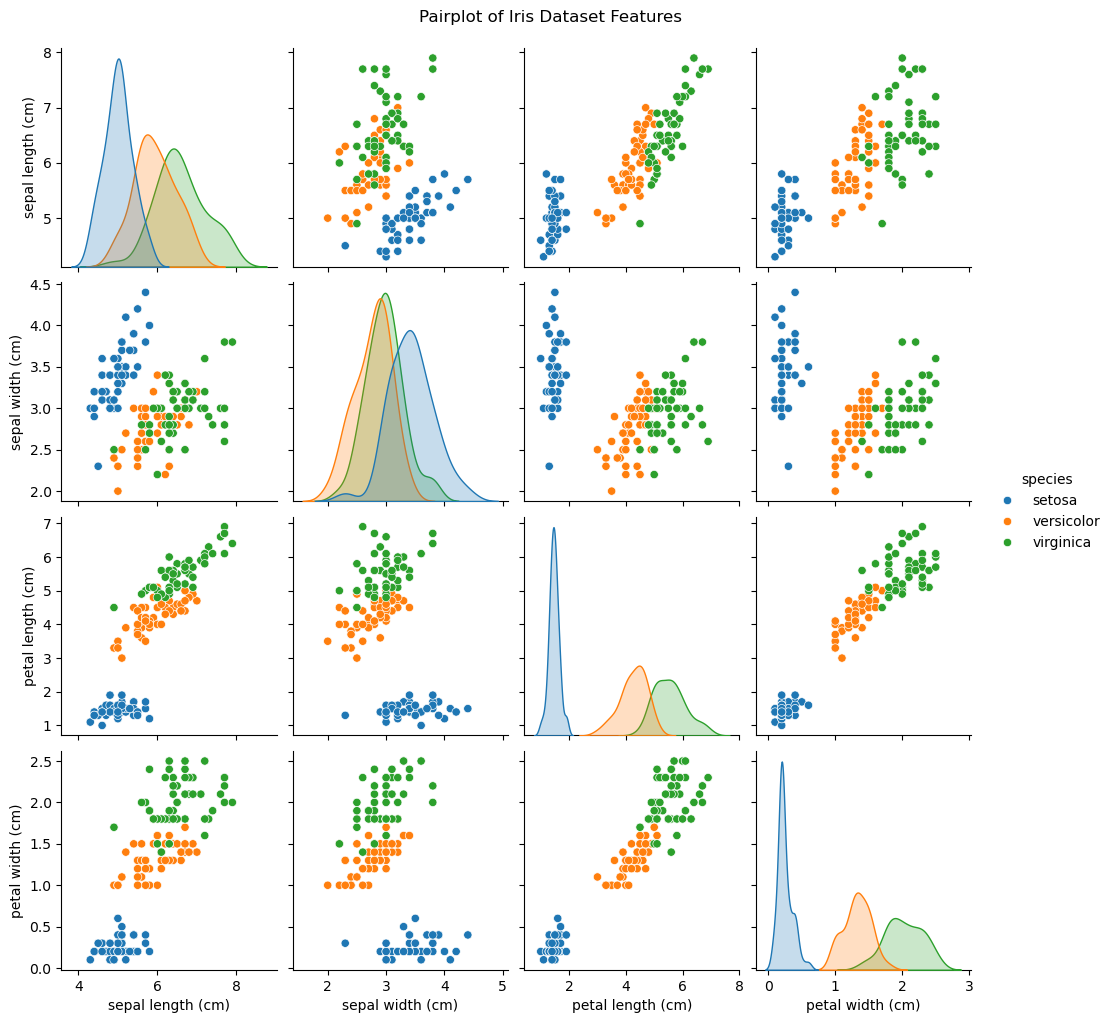

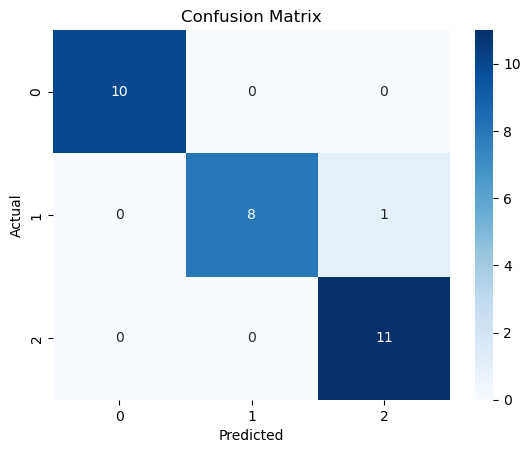

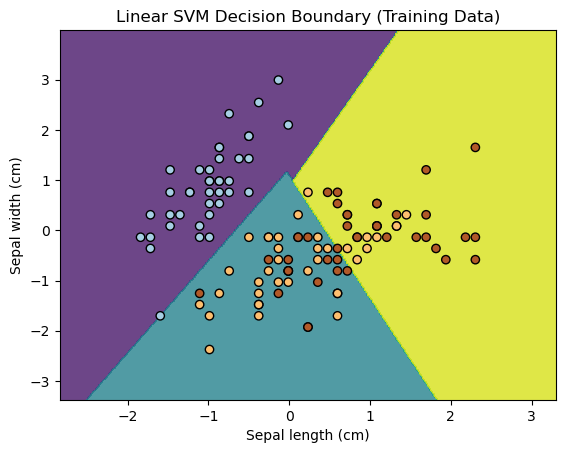


Kernel: Rbf SVM
Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


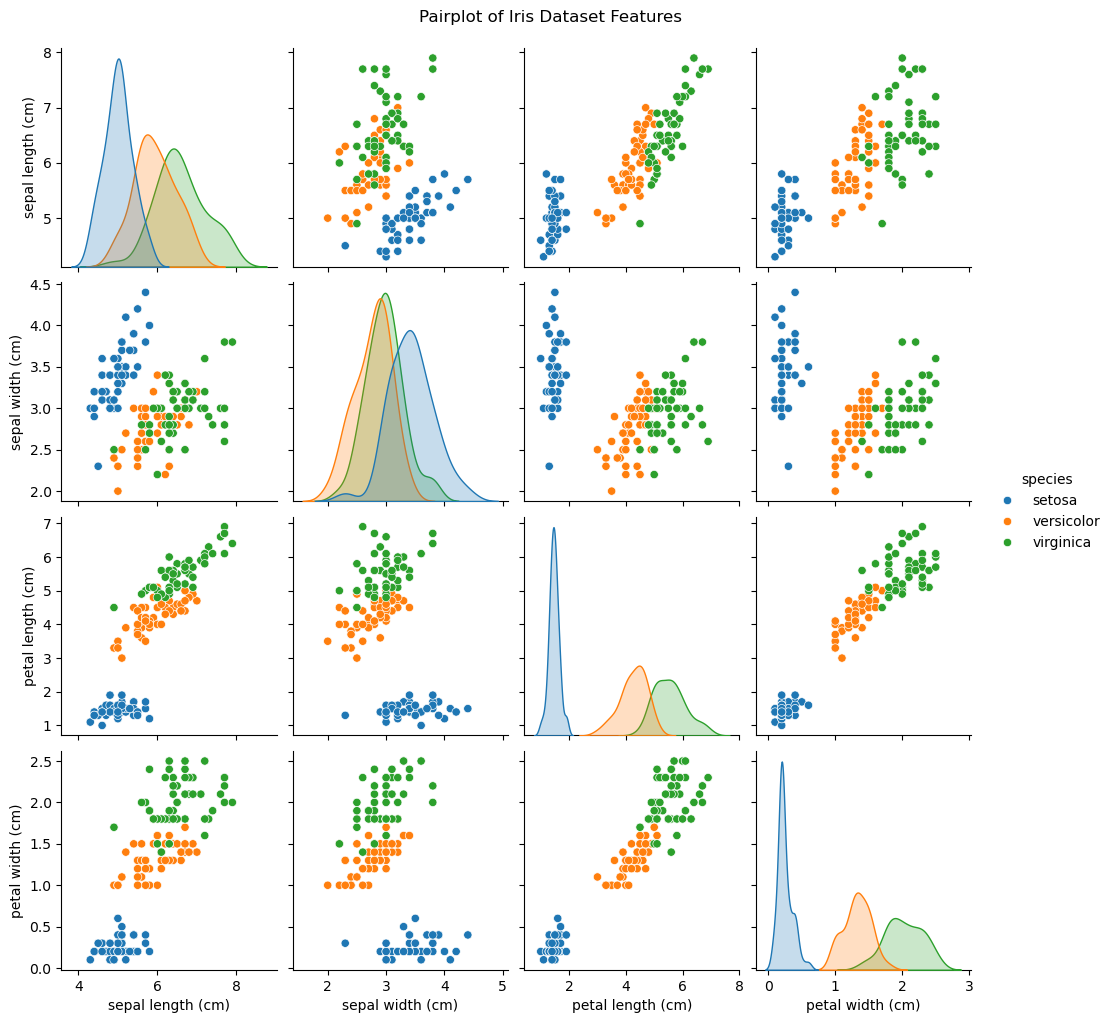

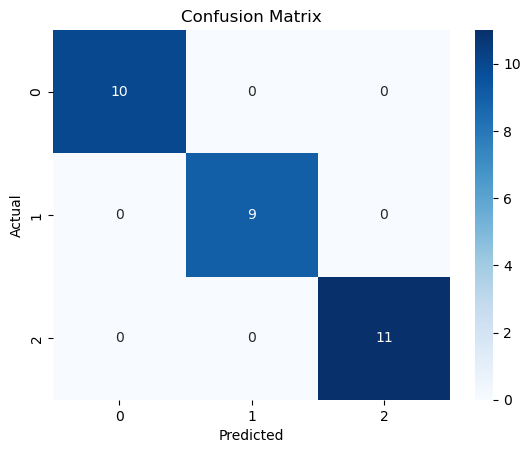

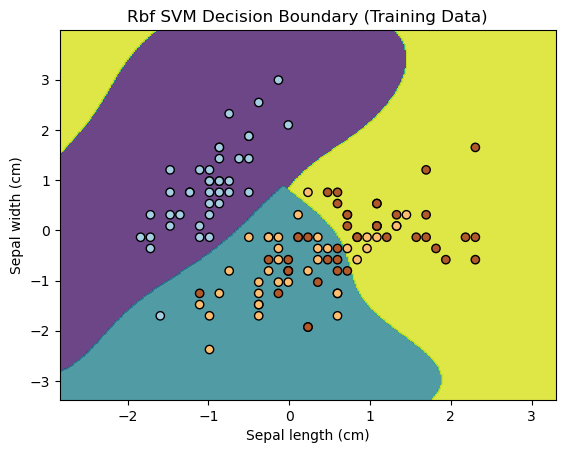


Kernel: Sigmoid SVM
Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.9014
Recall: 0.9000
F1 Score: 0.8992

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


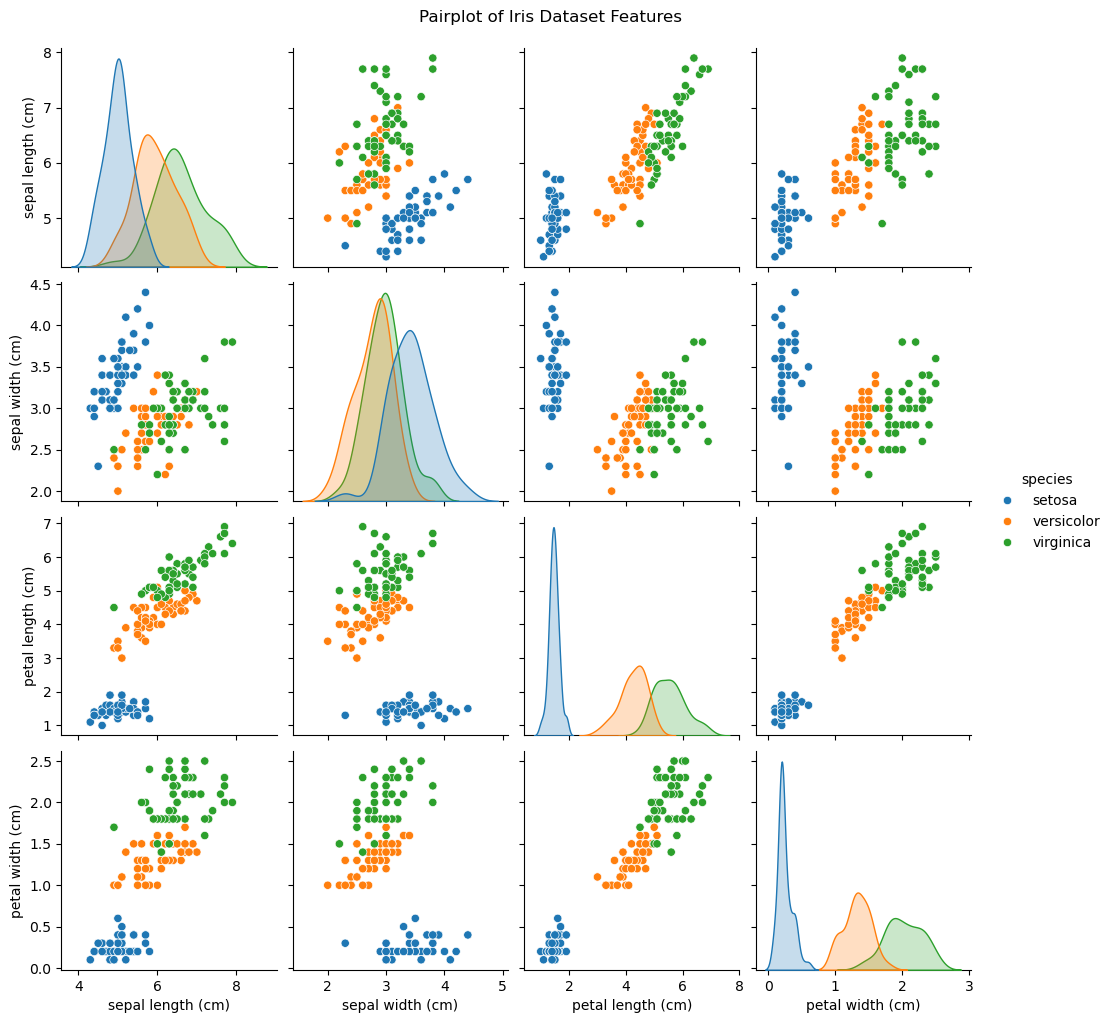

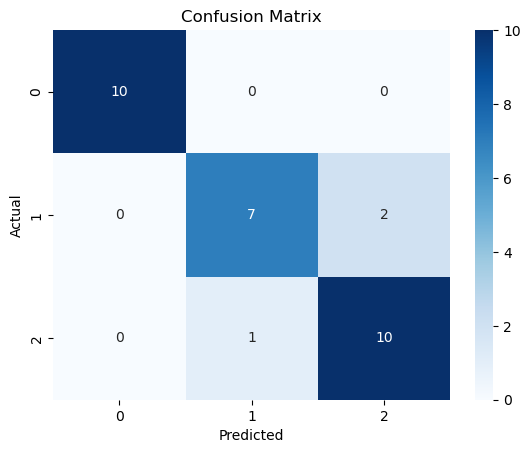

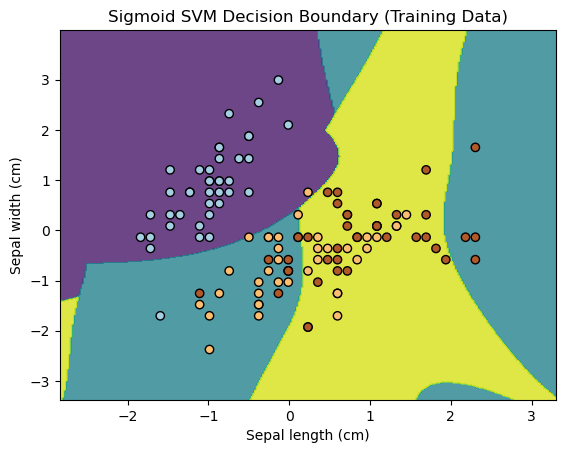


Kernel: Poly SVM
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9700
Recall: 0.9667
F1 Score: 0.9668

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


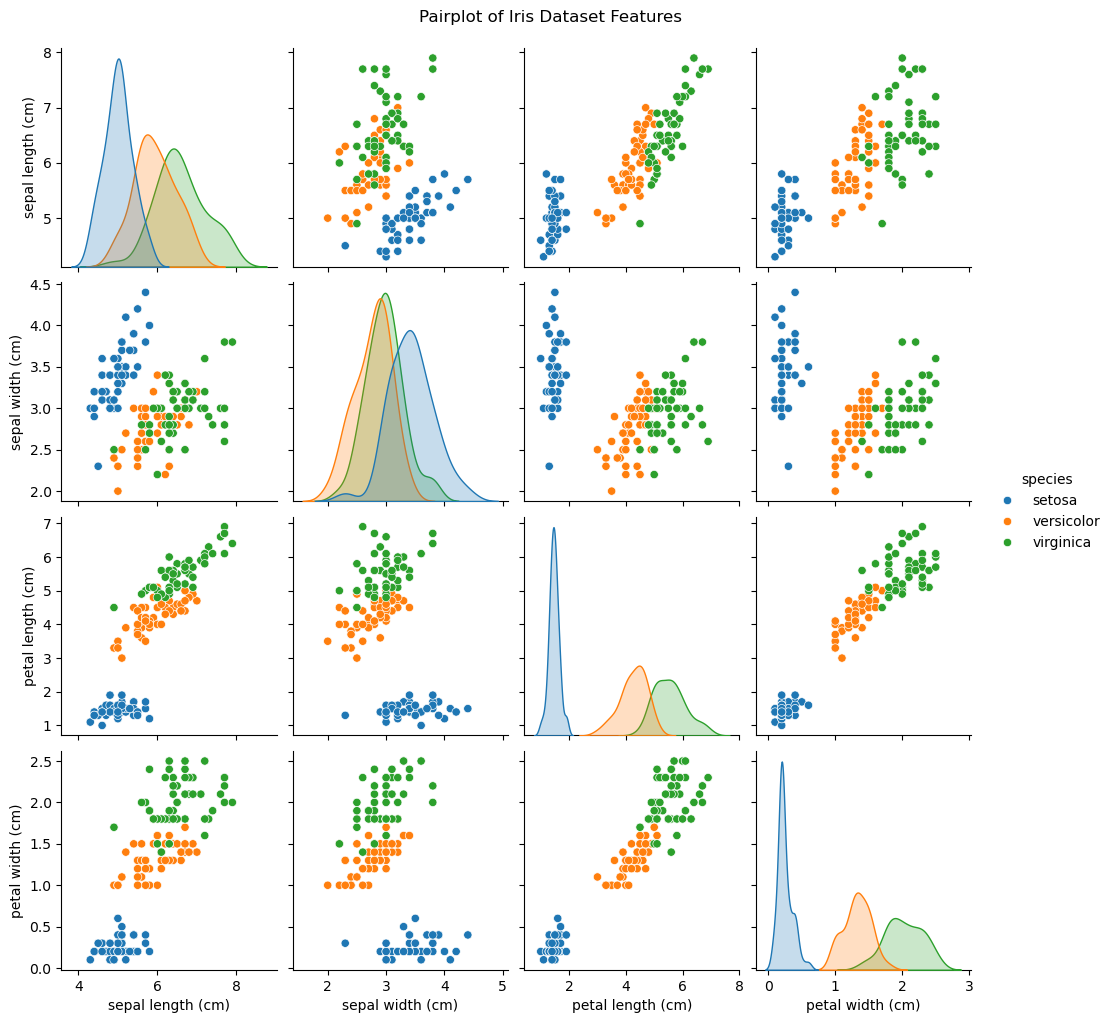

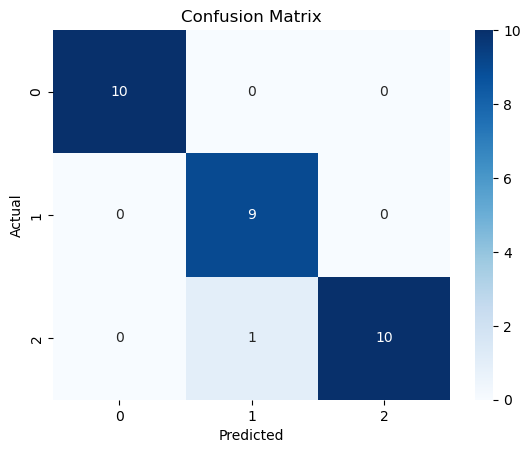

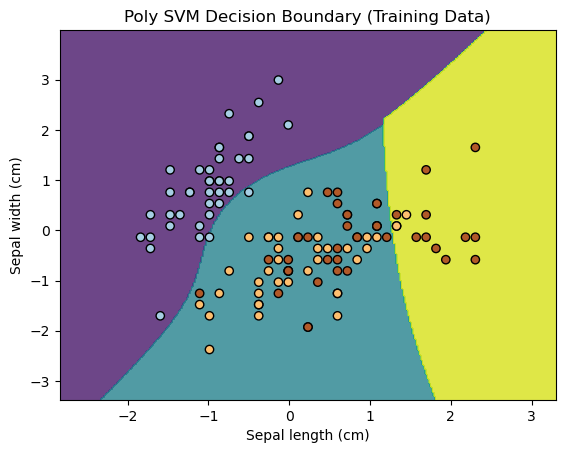

/var/folders/fx/br8qx3w52jg4lm6gl0fznjyc0000gn/T/ipykernel_25072/290030795.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=mean_cv_accuracies, palette='viridis')


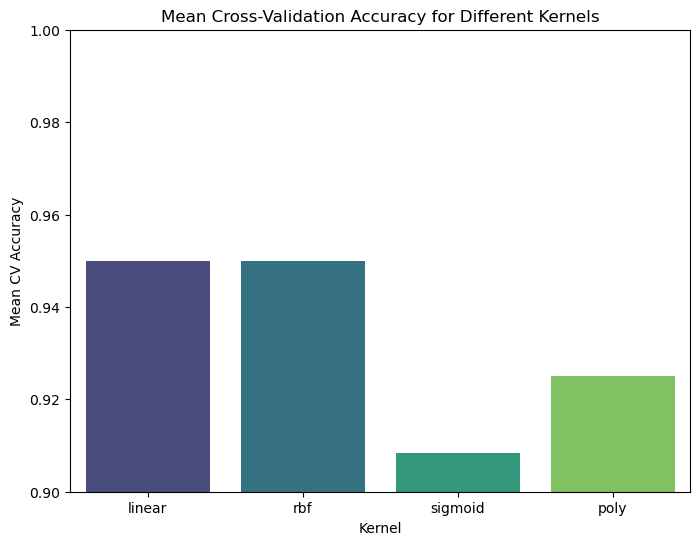

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for data exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = target_names[y]

# Data exploration
print("Dataset shape:", iris_df.shape)
print("Columns:", iris_df.columns)
print("Target names:", target_names)
print("Sample data:\n", iris_df.head())

# Check for missing values (though the Iris dataset is clean)
print("Missing values:\n", iris_df.isnull().sum())

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation with different kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
mean_cv_accuracies = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    mean_cv_accuracy = np.mean(cv_scores)
    mean_cv_accuracies.append(mean_cv_accuracy)

    # Model fitting
    svm_model.fit(X_train_scaled, y_train)

    # Evaluation Metrics
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nKernel: {kernel.capitalize()} SVM")
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Pairplot of features colored by species
    sns.pairplot(iris_df, hue='species', height=2.5)
    plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
    plt.show()

    # Confusion Matrix Heatmap
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Decision Boundary Plot (2D)
    def plot_decision_boundary(X, y, model, title):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length (cm)')
        plt.ylabel('Sepal width (cm)')
        plt.title(title)
        plt.show()

    # Visualize decision boundary on training data (using only first two features)
    X_train_two_features = X_train_scaled[:, :2]  # Considering only first two features for visualization
    svm_model_2d = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model_2d.fit(X_train_two_features, y_train)
    plot_decision_boundary(X_train_two_features, y_train, svm_model_2d, f"{kernel.capitalize()} SVM Decision Boundary (Training Data)")

# Plotting mean cross-validation accuracies for different kernels
plt.figure(figsize=(8, 6))
sns.barplot(x=kernels, y=mean_cv_accuracies, palette='viridis')
plt.title('Mean Cross-Validation Accuracy for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Mean CV Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.show()


Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target names: ['setosa' 'versicolor' 'virginica']
Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Kernel: Linear SVM
Cross-Validation Scores: [0.95833333 1.         0.83333333 1.

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


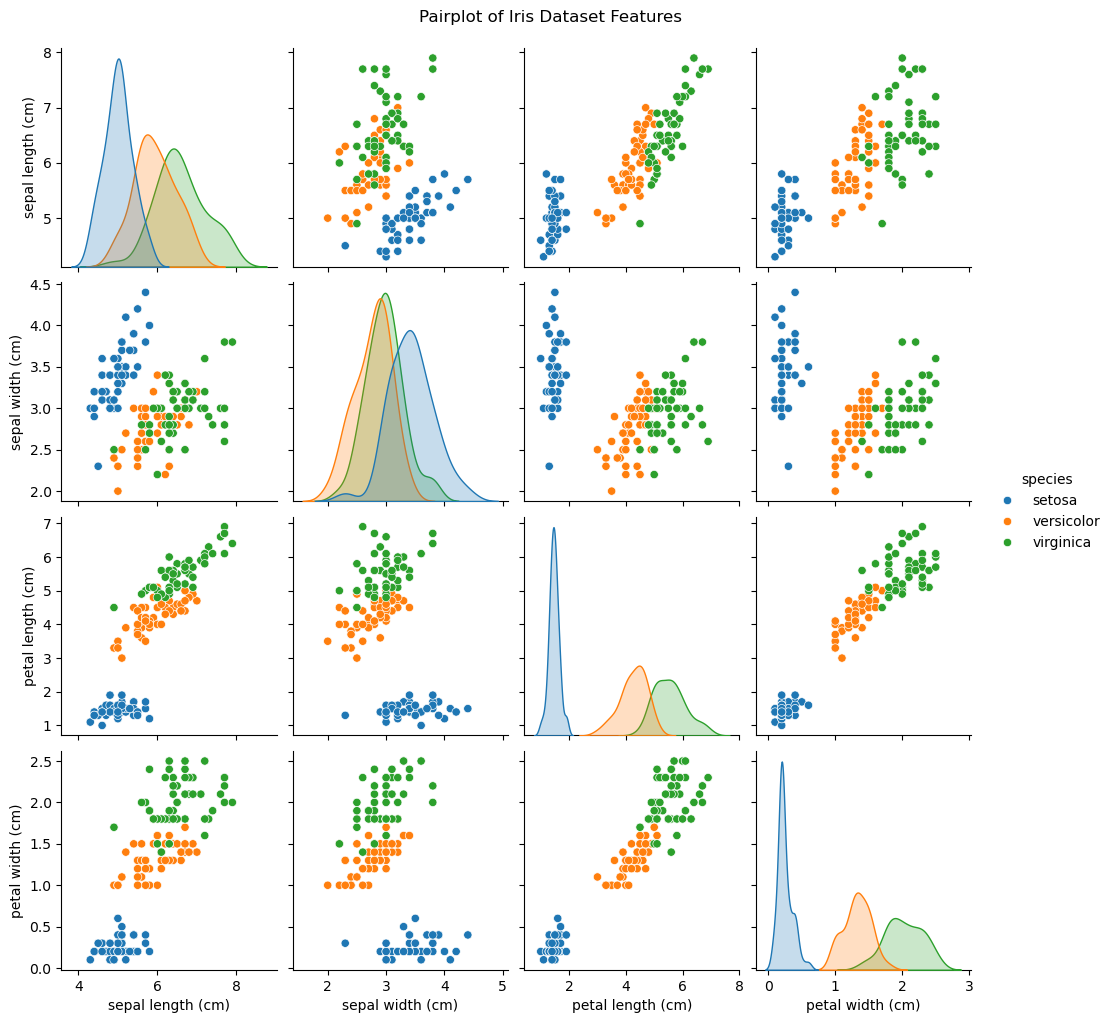

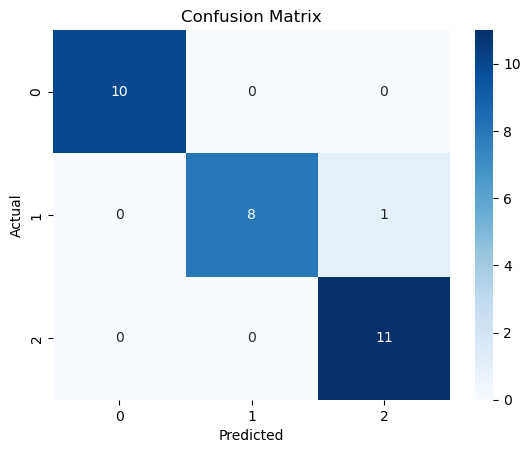

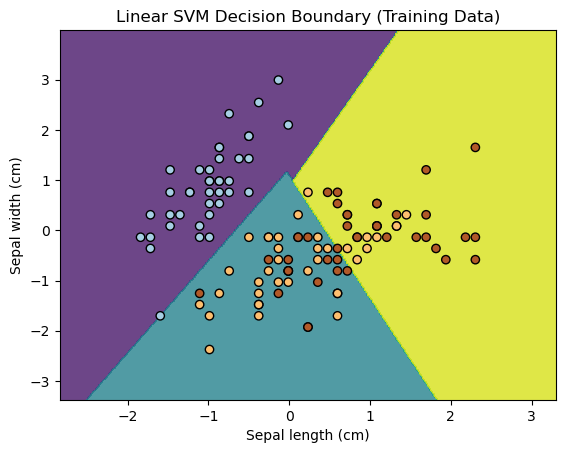


Kernel: Rbf SVM
Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV Accuracy: 0.95
Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


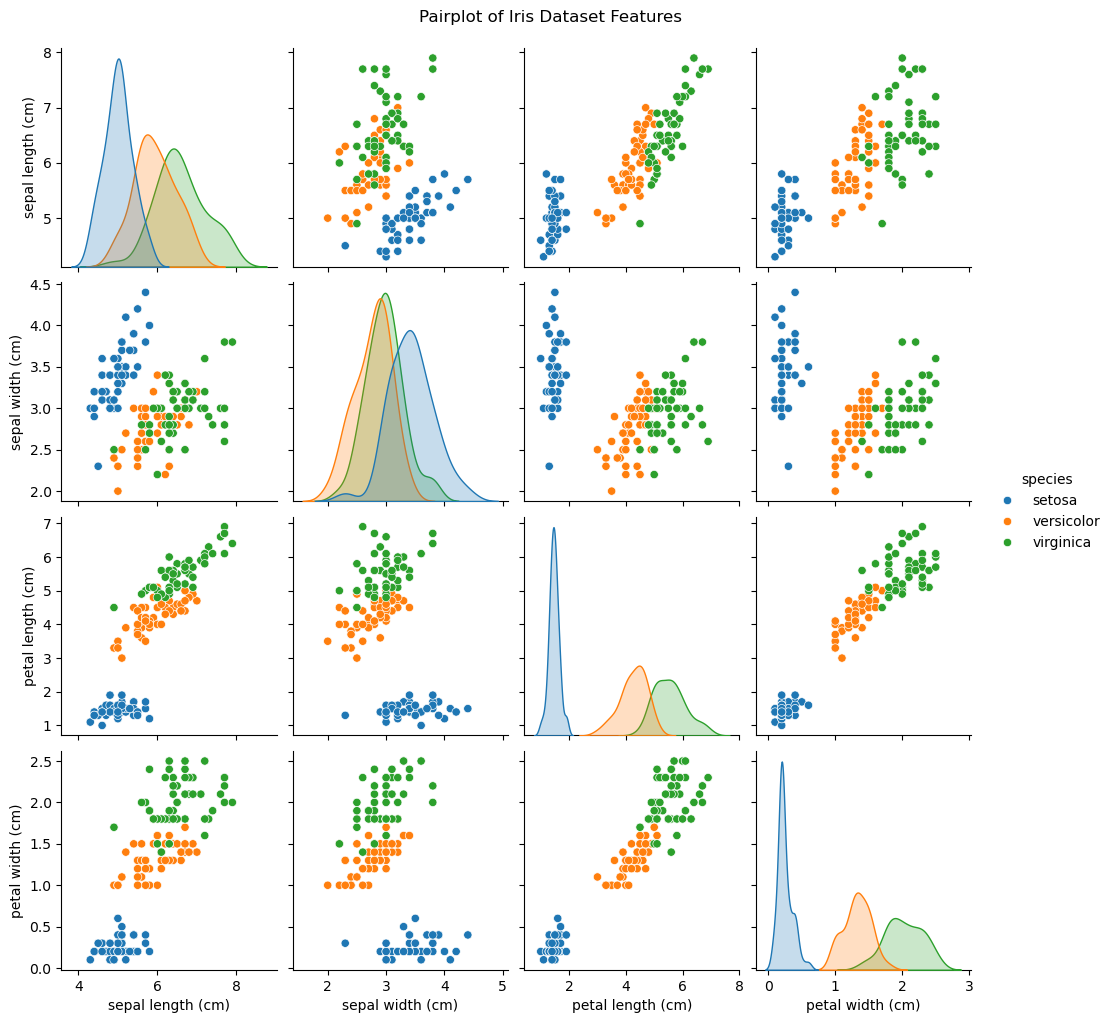

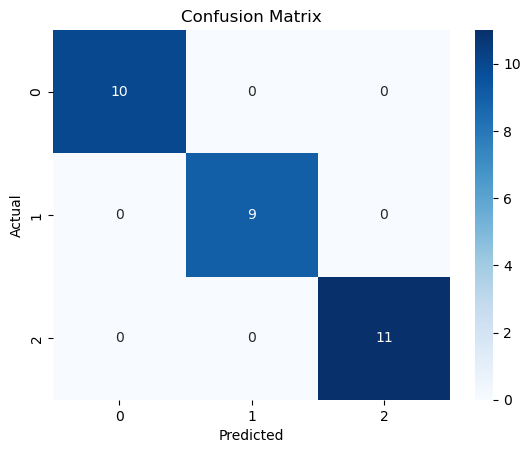

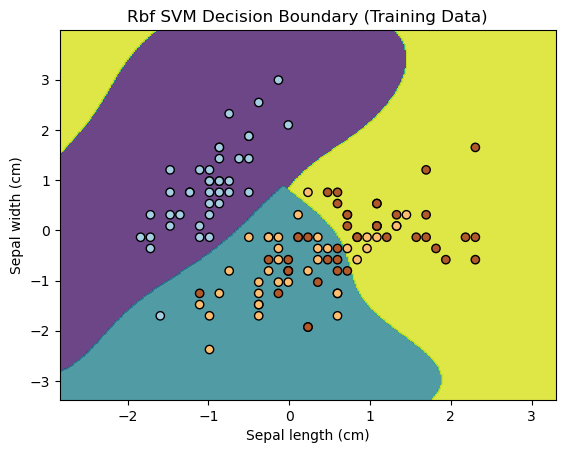


Kernel: Sigmoid SVM
Cross-Validation Scores: [0.95833333 0.95833333 0.83333333 0.875      0.91666667]
Mean CV Accuracy: 0.9083333333333334
Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.9014
Recall: 0.9000
F1 Score: 0.8992

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


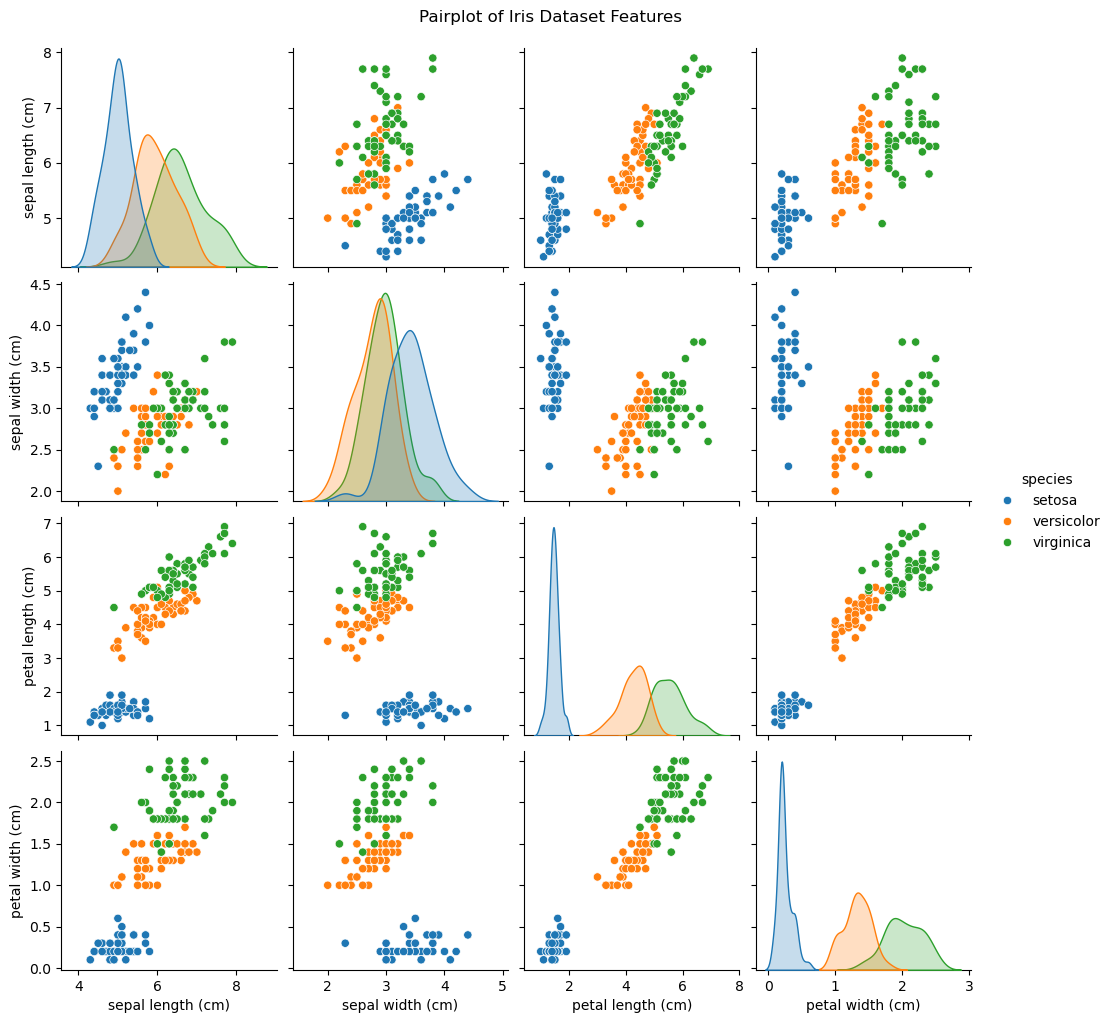

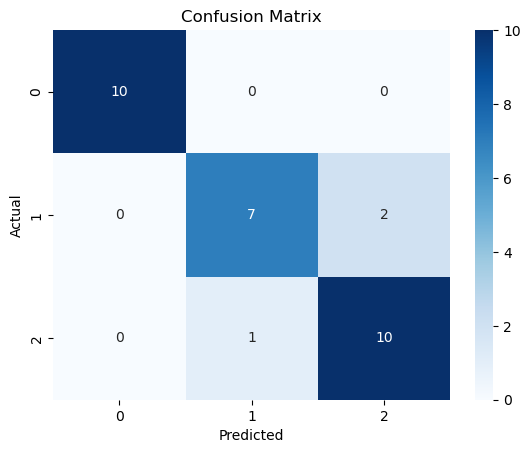

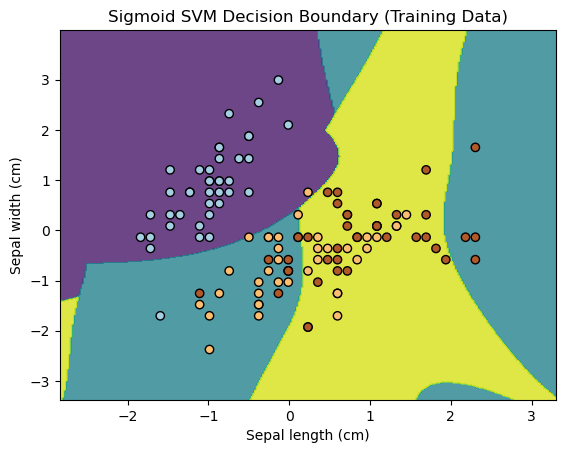


Kernel: Poly SVM
Cross-Validation Scores: [0.95833333 0.91666667 0.91666667 0.95833333 0.875     ]
Mean CV Accuracy: 0.925
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9700
Recall: 0.9667
F1 Score: 0.9668

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


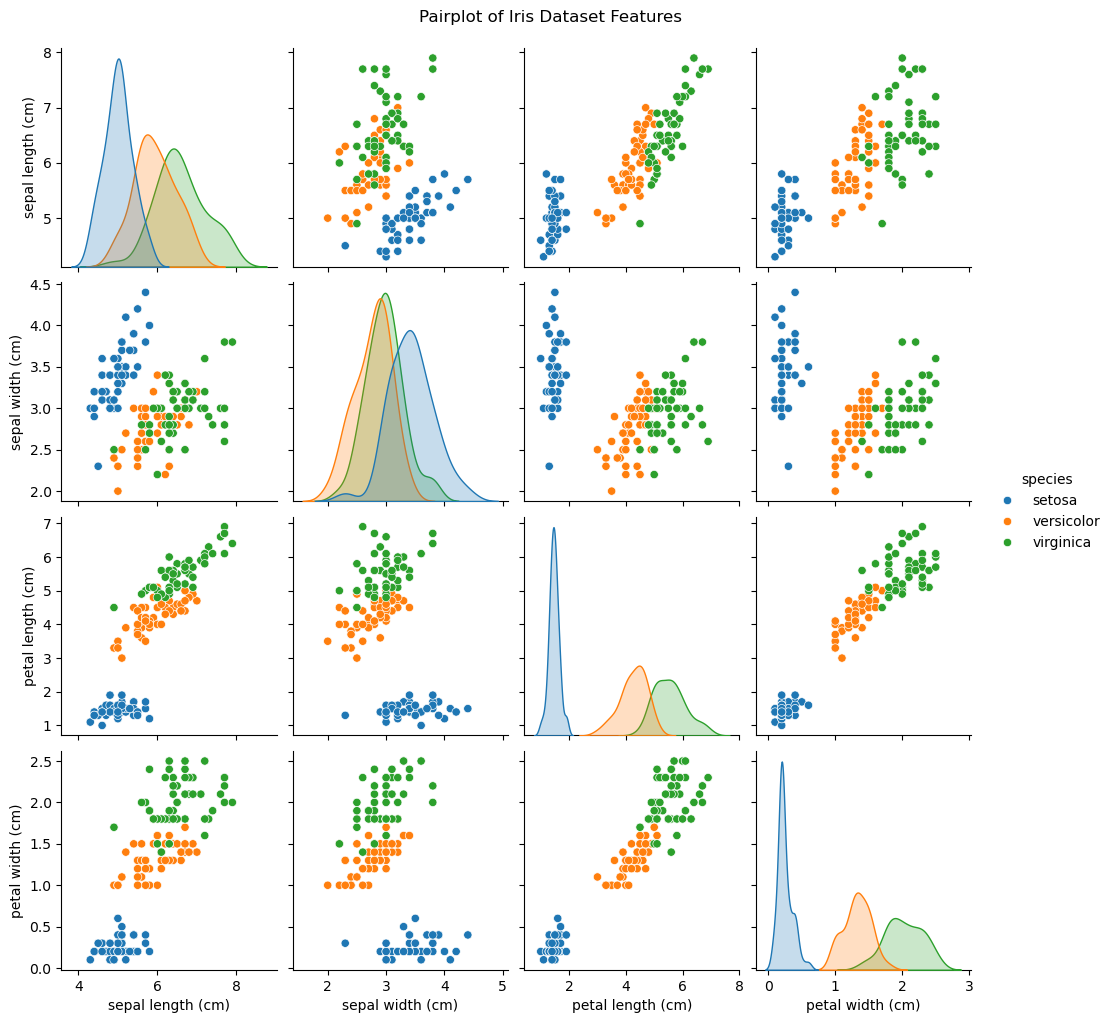

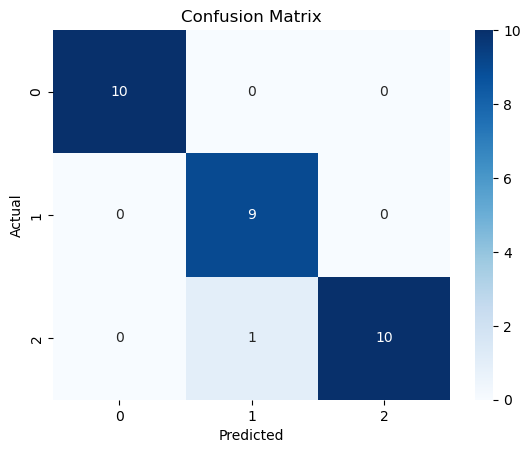

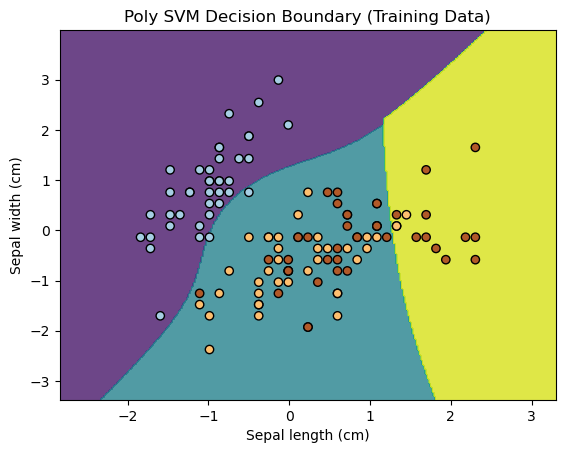

/var/folders/fx/br8qx3w52jg4lm6gl0fznjyc0000gn/T/ipykernel_25072/3167710114.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=mean_cv_accuracies, palette='viridis')


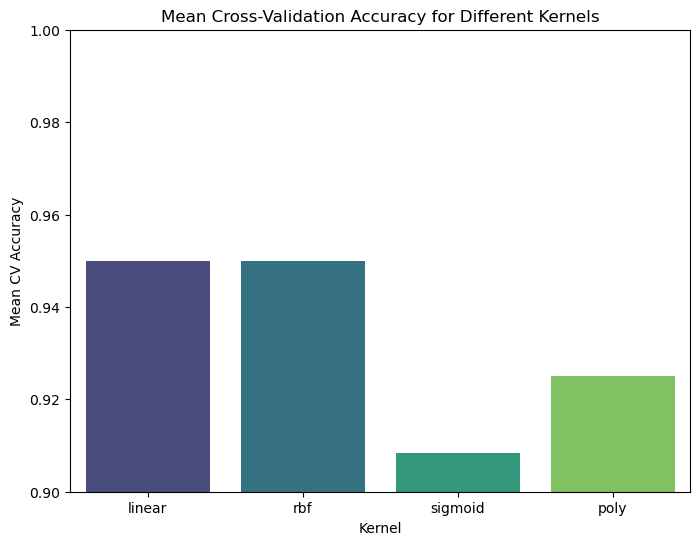

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for data exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = target_names[y]

# Data exploration
print("Dataset shape:", iris_df.shape)
print("Columns:", iris_df.columns)
print("Target names:", target_names)
print("Sample data:\n", iris_df.head())

# Check for missing values (though the Iris dataset is clean)
print("Missing values:\n", iris_df.isnull().sum())

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation with different kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
mean_cv_accuracies = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    mean_cv_accuracy = np.mean(cv_scores)
    mean_cv_accuracies.append(mean_cv_accuracy)

    # Model fitting
    svm_model.fit(X_train_scaled, y_train)

    # Evaluation Metrics
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nKernel: {kernel.capitalize()} SVM")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", mean_cv_accuracy)
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Pairplot of features colored by species
    sns.pairplot(iris_df, hue='species', height=2.5)
    plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
    plt.show()

    # Confusion Matrix Heatmap
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Decision Boundary Plot (2D)
    def plot_decision_boundary(X, y, model, title):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length (cm)')
        plt.ylabel('Sepal width (cm)')
        plt.title(title)
        plt.show()

    # Visualize decision boundary on training data (using only first two features)
    X_train_two_features = X_train_scaled[:, :2]  # Considering only first two features for visualization
    svm_model_2d = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model_2d.fit(X_train_two_features, y_train)
    plot_decision_boundary(X_train_two_features, y_train, svm_model_2d, f"{kernel.capitalize()} SVM Decision Boundary (Training Data)")

# Plotting mean cross-validation accuracies for different kernels
plt.figure(figsize=(8, 6))
sns.barplot(x=kernels, y=mean_cv_accuracies, palette='viridis')
plt.title('Mean Cross-Validation Accuracy for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Mean CV Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.show()
